In [ ]:
from PIL import Image
from pylab import *
import glob
import pandas as pd
import numpy as numpy

#reading all 10 images & resizing to 100X100 pixels
img1 = []
images=glob.glob("/content/*.PNG")
for image in images:
    img = Image.open(image)
    img1.append(img.resize((100,100)))



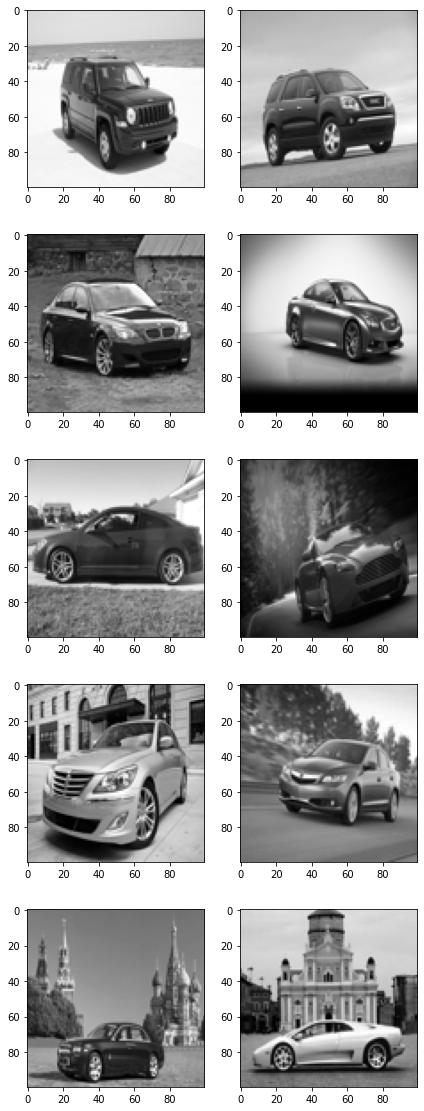

In [ ]:
# converting to greyscale

img_grey = []
fig = plt.figure(figsize=(7, 20))
for i in range (10):
  img_grey.append(img1[i].convert('L'))
  fig.add_subplot(5, 2, i+1)
  imshow(img_grey[i], cmap = 'gray')



In [ ]:
#flattening and Histogram generation

img_flatten = []
for i in range(10):
  img_flatten.append(array(img_grey[i]).flatten())

img_output = pd.DataFrame(np.array(img_flatten))
img_output.to_csv(r'/content/img_output.csv', index=False)
img_output.head(10)



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,9960,9961,9962,9963,9964,9965,9966,9967,9968,9969,9970,9971,9972,9973,9974,9975,9976,9977,9978,9979,9980,9981,9982,9983,9984,9985,9986,9987,9988,9989,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,219,219,219,220,221,222,222,223,223,224,223,223,223,223,223,223,224,225,225,225,225,225,225,226,227,227,229,227,227,227,226,226,225,225,225,224,224,224,224,224,...,245,246,245,245,245,245,245,244,244,243,244,244,243,243,243,245,243,242,242,241,240,241,241,241,242,242,241,240,241,240,240,239,242,242,240,238,239,238,237,238
1,153,155,157,159,160,161,161,161,162,163,164,163,164,163,164,164,164,165,166,166,166,166,167,167,167,168,169,169,169,169,169,170,170,170,171,171,171,172,172,172,...,131,132,132,131,137,137,132,140,139,137,135,135,131,130,131,137,133,130,136,139,137,145,137,131,132,134,137,138,129,130,130,128,129,126,123,124,126,118,117,114
2,69,70,62,47,41,43,43,43,43,42,47,46,48,51,50,48,47,49,54,53,52,50,47,48,46,49,51,50,50,51,51,52,59,57,55,51,52,53,54,51,...,156,138,142,161,155,151,143,145,155,156,155,159,162,163,165,153,142,139,140,155,156,147,145,150,141,153,151,142,146,149,153,149,142,148,146,147,154,150,152,154
3,90,93,96,98,100,103,105,108,111,114,116,119,121,124,126,129,132,135,138,141,144,147,150,153,156,160,163,166,169,173,175,179,182,185,187,191,195,197,201,204,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,183,185,188,190,192,193,194,194,193,193,194,193,193,193,193,193,193,193,193,193,193,192,192,192,193,193,192,192,191,191,191,191,191,191,191,191,190,190,191,190,...,111,138,131,102,116,130,126,121,143,129,134,130,128,137,128,106,96,118,127,141,153,133,80,88,100,138,154,124,104,146,142,115,118,145,133,124,131,139,136,161
5,46,46,48,48,58,69,61,55,69,87,95,96,93,92,92,92,89,83,84,87,90,98,97,97,95,91,81,74,68,64,61,54,53,63,67,76,76,76,79,74,...,57,57,57,58,58,58,58,58,59,60,61,61,61,61,61,59,58,58,57,56,55,55,56,57,56,56,57,56,56,56,56,55,55,55,55,54,54,54,54,53
6,125,80,89,143,117,113,133,109,92,150,196,205,203,196,180,175,150,148,153,133,160,197,213,213,201,181,181,195,207,211,207,212,209,207,200,188,181,195,168,132,...,203,206,208,211,211,195,182,211,209,208,209,209,210,207,206,205,204,203,200,203,199,197,199,192,193,194,193,189,191,189,182,173,173,183,180,179,179,178,180,172
7,42,37,36,46,56,59,55,58,55,44,47,70,83,86,87,77,74,76,70,67,64,64,63,55,51,46,41,54,55,45,48,67,56,46,45,60,73,53,48,47,...,110,109,108,108,109,109,109,111,111,111,111,111,111,111,111,112,112,112,112,114,117,117,110,101,84,79,88,108,119,124,125,123,126,128,131,132,134,135,134,134
8,108,108,108,108,108,108,107,108,108,107,107,107,106,106,106,106,106,106,106,106,106,106,106,105,105,104,104,104,104,104,104,104,102,102,102,102,103,103,103,102,...,134,127,127,135,129,122,127,122,116,128,137,121,126,129,130,126,124,111,115,123,126,129,124,117,128,130,116,124,129,136,126,116,117,119,128,114,121,135,133,115
9,194,193,194,194,194,195,195,197,197,197,196,197,199,199,200,200,201,202,202,201,201,205,205,204,206,207,206,204,202,201,200,200,199,198,197,197,197,198,197,196,...,105,109,116,109,116,112,108,120,117,128,119,117,115,116,122,108,113,117,115,115,112,114,101,102,107,105,105,99,104,106,115,117,119,113,119,114,115,104,110,112


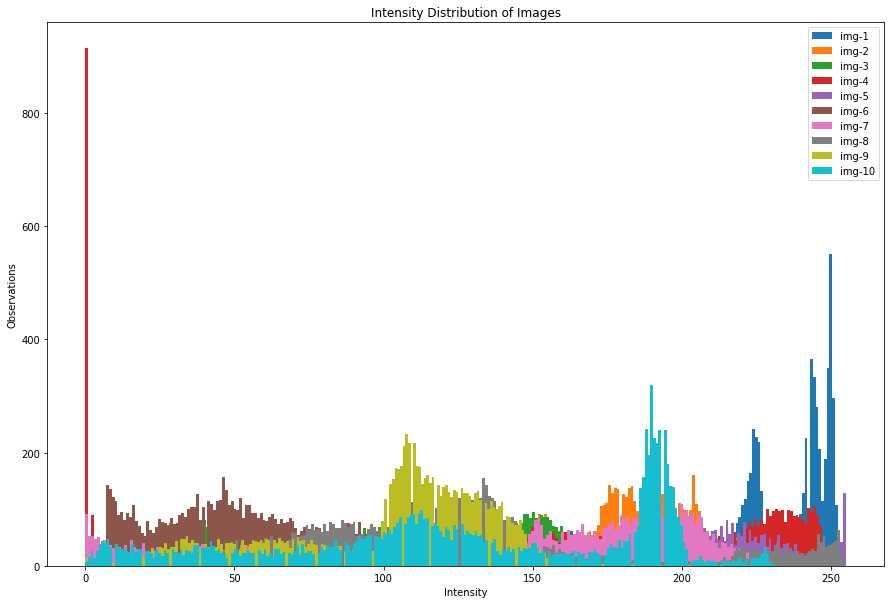

In [ ]:
plt.figure(figsize=(15,10))
for i in range(10):
  hist_m = hist(img_flatten[i], 256)

plt.title('Intensity Distribution of Images')
plt.xlabel('Intensity')
plt.ylabel('Observations')
plt.legend(['img-1','img-2','img-3','img-4','img-5','img-6','img-7','img-8','img-9','img-10'])

In [ ]:
## histogram equalization for contrast enhancement
im_norm = []
for i in range(10):
  imhist, bins = histogram(img_flatten[i], 256, density=True)
  cdf = imhist.cumsum() # cumulative distribution 
  cdf = 255 * cdf / cdf[-1] # normalize to [0, 255]
  im2 = interp(img_flatten[i], bins[:-1], cdf) # interpolate the new values
  im_norm.append(im2.reshape(array(img_grey[i]).shape)) # convert back to pixel 2-dimensional repre

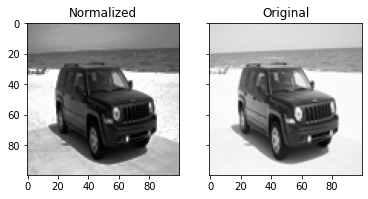

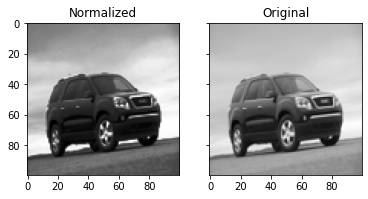

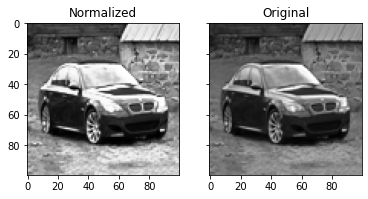

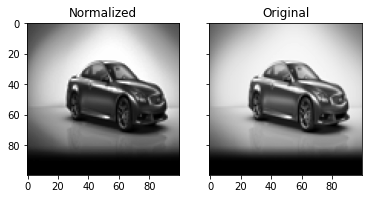

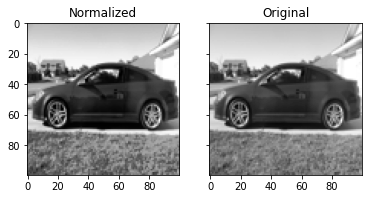

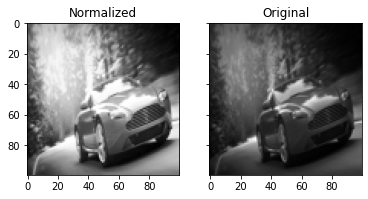

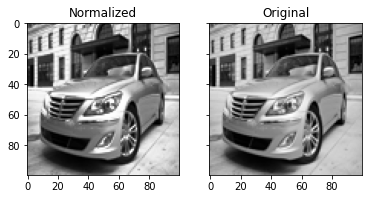

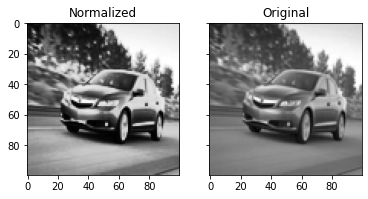

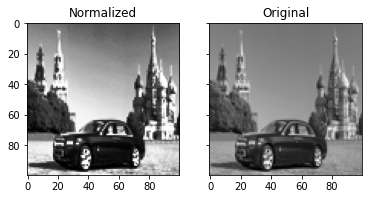

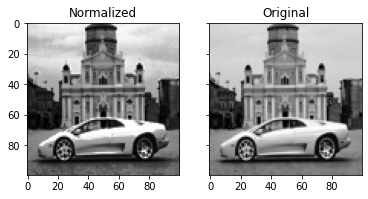

In [ ]:
# display


for i in range(10):
  fig, ax = plt.subplots(1, 2, sharey = True)
  ax[0].imshow(im_norm[i], cmap = 'gray')
  ax[1].imshow(img_grey[i], cmap = 'gray')
  ax[0].set_title('Normalized')
  ax[1].set_title('Original')  
  fig.savefig('Norm_Pic.png')

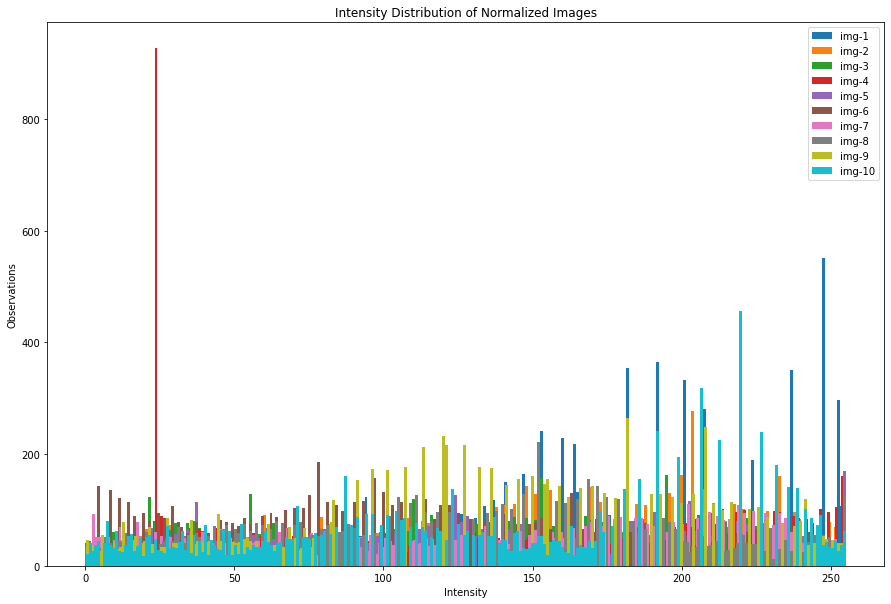

In [ ]:
plt.figure(figsize=(15,10))
for i in range(10):
  hist_m = hist(array(im_norm[i]).flatten(), 256)
plt.title('Intensity Distribution of Normalized Images')
plt.xlabel('Intensity')
plt.ylabel('Observations')
plt.legend(['img-1','img-2','img-3','img-4','img-5','img-6','img-7','img-8','img-9','img-10'])  

The second histogram is more spread out than the first histogram which which gives more variation in intensity leading to higher contrast images.